In [ ]:
## Import things

import nltk
nltk.download('cess_esp')


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [ ]:
import matplotlib.pyplot as plt

# DEFINIENDO FUNCIONES IMPORTANTES 
def print_plot(medias, desviaciones, n_particiones):
    x = [i for i in range(n_particiones)]
    y = medias
    plt.axis([-1, 10, 0.84, 0.95])
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    plt.title(str(n_particiones) + '-fold cross validation accuracy and confidence intervals')
    # plt.title(f'{n_particiones}-fold cross validation accuracy and confidence intervals')
    plt.plot(x,y,'ro')
    plt.errorbar(x,y,yerr=desviaciones,linestyle='None')
    plt.show()

In [ ]:
def reduce_corpus_categories(c):
  processed_sentences = list()
  for sentence in c:
      processed_sentence = list()
      for elem in sentence:
          if '*0*' not in elem[0]:
              new_c = elem[1]
              if len(new_c) > 2:
                  if new_c.startswith("v") or new_c.startswith("F"):
                      new_c = new_c[0:3]
                  else:
                      new_c = new_c[0:2]
              processed_sentence.append( (elem[0], new_c) )
      processed_sentences.append( processed_sentence )

  return processed_sentences

#### **Tarea 1: Evaluación del etiquetador ‘hmm’ sobre el corpus ‘cess-esp’ utilizando el juego de categorías completo y reducido.**
Utilizando el etiquetador hmm basado en modelos de Markov, se realizará una validación cruzada sobre 10 particiones del corpus. Barajar el corpus antes de realizar las particiones. Presentar los resultados en forma de tabla y gráficamente, incluyendo los intervalos de confianza.

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus accuracy: [0.8955576559546313, 0.893134682967876, 0.8944229360678037, 0.8975737020610488, 0.8972183659828269, 0.8962664078860003, 0.9024377374419587, 0.9001975257303254, 0.8969235822202759, 0.8939155187312561]
Corpus deviation: [0.004343722431502256, 0.0042601511289263256, 0.004356488123118695, 0.004292817813041895, 0.004267900339462142, 0.004271093573990628, 0.004224527127288341, 0.004235607150106918, 0.004409282755090354, 0.0043032337989344]


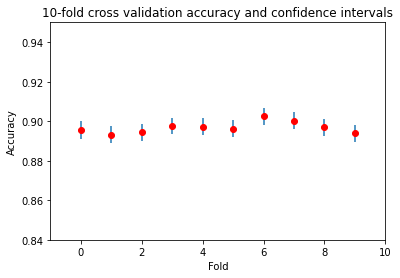

In [ ]:
## Normal corpus results

import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import math

# Carga del corpus                         
corpus_sentences = cess_esp.tagged_sents()

from nltk.tag import hmm
from sklearn.model_selection import KFold
import numpy as np

corpus = np.array(corpus_sentences, dtype=object)
n_particiones = 10
# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus):
    number_test_samples = sum([len(corpus_sentences[i]) for i in test_index])
    train = corpus[train_index]
    test = corpus[test_index]
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(train)
    accuracy = tagger_hmm.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus accuracy: ' + str(results))
print('Corpus deviation: ' + str(deviation))

print_plot(results, deviation, n_particiones)


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.9309729871492264, 0.9238333073201186, 0.9250876469375129, 0.9244698466962235, 0.924948841325148, 0.9226828624240824, 0.9245879548046024, 0.92801243567753, 0.9299191374663073, 0.9246452022876509]
Corpus with reduced categories deviation: [0.00356220192105162, 0.0037123793039557556, 0.003668783349660743, 0.0037476352504308415, 0.0038031941870797837, 0.00376563271864596, 0.0036848517873400493, 0.003671177886608804, 0.0036373357285491366, 0.003725830096682174]


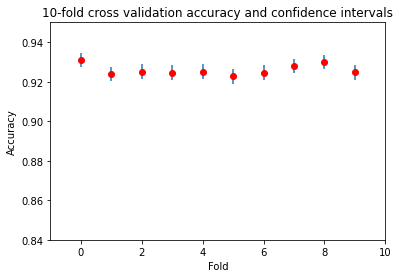

In [ ]:
## Reduced categories corpus results

import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import math

# Carga del corpus                         
reduced_categories_corpus_sentences = reduce_corpus_categories( cess_esp.tagged_sents() )

from nltk.tag import hmm
from sklearn.model_selection import KFold
import numpy as np

reduced_categories_corpus = np.array(reduced_categories_corpus_sentences, dtype=object)
n_particiones = 10
# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(reduced_categories_corpus):
    number_test_samples = sum([len(corpus_sentences[i]) for i in test_index])
    train = reduced_categories_corpus[train_index]
    test = reduced_categories_corpus[test_index]
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(train)
    accuracy = tagger_hmm.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))

print_plot(results, deviation, n_particiones)

#### **Tarea 2: Evaluación de las prestaciones del etiquetador respecto a la cantidad de datos de aprendizaje.**
Se trata de estudiar cómo varían las prestaciones del etiquetador hmm cuando varía el tamaño del corpus de aprendizaje. Para este experimento se dividirá el corpus de entrenamiento en 10 partes de tamaño similar. La partición 10 se tomará como test, y las 9 particiones restantes se tomarán como entrenamiento. En cada ejecución, se irá incrementando sucesivamente el tamaño del corpus
de entrenamiento, manteniendo fija la partición de test.

Importante: Para esta tarea no es necesario realizar la validación cruzada. 

Corpus accuracy varying train data: [0.8015258063679062, 0.8487323870565949, 0.8764719620105353, 0.8962607364351143, 0.9108596932817812, 0.9227339959000441, 0.9320185795469289, 0.9400264680696474, 0.9468355087318681]
Corpus deviation varying train data: [0.0017809137853070883, 0.0015998913190505679, 0.001469210093597228, 0.0013615101508542191, 0.001272315804477063, 0.0011922425156152988, 0.0011239306638191372, 0.0010601857721908225, 0.001001798131366402]


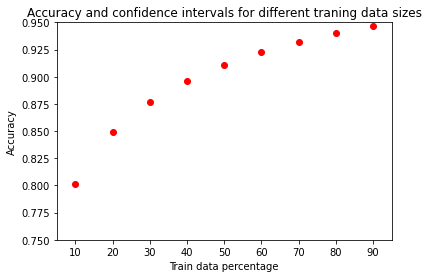

In [ ]:
import numpy as np
from random import shuffle
from nltk.corpus import cess_esp
import math
import matplotlib.pyplot as plt


# Carga del corpus                         
corpus_sentences = cess_esp.tagged_sents()

from nltk.tag import hmm
import numpy as np

corpus = np.array(corpus_sentences, dtype=object)
shuffle(corpus)
n_particiones = 10

n_test_samples = int(len(corpus)*0.1)
test = corpus[len(corpus)-number_test_samples:]
number_test_samples = sum([len(sentence) for sentence in test])



results = []
deviation = []
for i in range(1, n_particiones):
  train = corpus[:n_test_samples*i + 1]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(train)
  accuracy = tagger_hmm.evaluate(test)
  results.append(accuracy)
  ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
  deviation.append(ic)

print(f'Corpus accuracy varying train data: {results}')
print(f'Corpus deviation varying train data: {deviation}')

x = [i*10 for i in range(1, n_particiones)]
y = results
plt.axis([5, 95, 0.75, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Train data percentage')
plt.title(f'Accuracy and confidence intervals for different traning data sizes')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=deviation,linestyle='None')
plt.show()

#### **Tarea 3: Evaluación del método de suavizado para palabras desconocidas para el etiquetador tnt.**
El etiquetador tnt por defecto no incorpora un método de suavizado para las palabras desconocidas. Utiliza un método basado en los sufijos de las palabras para construir un modelo para las palabras desconocidas (Affix Tagger). En base al sufijo de la palabra desconocida le asigna una categoría morfosintáctica. Este método funciona razonablemente bien para el inglés. 

En concreto, se trata de estudiar diferentes longitudes del sufijo (número de letras que se tienen en cuenta) y estudiar cómo varían las prestaciones del etiquetador. Una vez se haya decidido el sufijo que mejores prestaciones  proporciona, incorporarlo como modelo de suavizado al etiquetador tnt y comprobar si aumenta sus prestaciones.

Corpus accuracy: [0.8946576373212942, 0.8898392415498764, 0.8935257006929362, 0.8966450790954453, 0.8956638836520334, 0.8897170752191486, 0.8995867974311744, 0.8982827617648549, 0.8998262883613202, 0.8904138851802403]
Corpus deviation: [0.004261651338240336, 0.004404888455462955, 0.004347366086382897, 0.0043472492300875324, 0.004397425184069123, 0.004448128073908137, 0.004156382210839876, 0.004216725301817521, 0.004269428857711518, 0.004474235971711836]


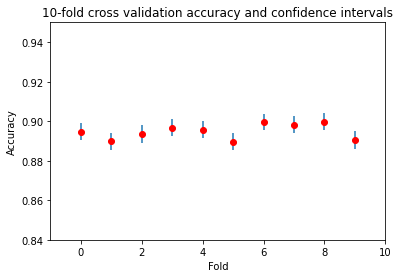

In [ ]:
## TnT results without smoothing

from nltk.corpus import cess_esp
import math

# Carga del corpus                         
corpus_sentences = cess_esp.tagged_sents()

from nltk.tag import tnt
from sklearn.model_selection import KFold
import numpy as np

corpus = np.array(corpus_sentences, dtype=object)
n_particiones = 10
# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus):
    number_test_samples = sum([len(corpus_sentences[i]) for i in test_index])
    train = corpus[train_index]
    test = corpus[test_index]
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)
    accuracy = tagger_tnt.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus accuracy: ' + str(results))
print('Corpus deviation: ' + str(deviation))


print_plot(results, deviation, n_particiones)

[0.21801659988551803, 0.22352604464796794, 0.24856897538637665, 0.2025615340583858, 0.15011448196908986, 0.09294504865483687, 0.0503005151688609]
Best suffix length is 3


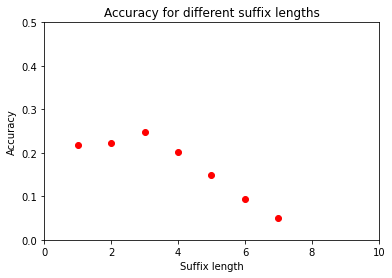

In [ ]:
## Best AffixTager suffix length

from nltk.corpus import cess_esp
import math

# Carga del corpus                         
corpus = cess_esp.tagged_sents()

from nltk.tag import AffixTagger
import numpy as np

test_finish_index = int(len(corpus)*0.1)
test = corpus[len(corpus)-test_finish_index:]
train = corpus[:len(corpus)-test_finish_index+1]

results = []
for suffix_size in range(1, 8):
  suffix_tagger = AffixTagger( train, affix_length=-suffix_size )
  accuracy = suffix_tagger.evaluate(test)
  results.append(accuracy)

print(results)
best_suffix_position = np.argmax(results)
print(f"Best suffix length is {best_suffix_position+1}")

x = [i for i in range(1, 8)]
y = results
plt.axis([0, 10, 0, 0.5])
plt.ylabel('Accuracy')
plt.xlabel('Suffix length')
plt.title(f'Accuracy for different suffix lengths')
plt.plot(x,y,'ro')
plt.show()

Corpus accuracy: [0.9421017574422299, 0.939599399616997, 0.9412399753238742, 0.9368050039714059, 0.9395316133917464, 0.9416373100583627, 0.9418161491945729, 0.9406811277514256, 0.9358492535755298, 0.9339706420101342]
Corpus deviation: [0.0032766581775450655, 0.0033591799091256267, 0.0033049516288337242, 0.003360076469989643, 0.003435731760458014, 0.0033317446677414006, 0.003270686026137768, 0.0033800458426325656, 0.0034696430123843727, 0.0035179221258293107]


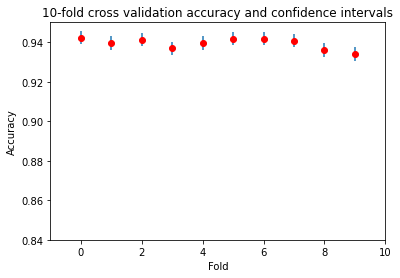

In [ ]:
## TnT results suffix tagger of length 3 as smoothing method

from nltk.corpus import cess_esp
import math

# Carga del corpus                         
corpus_sentences = cess_esp.tagged_sents()

from nltk.tag import tnt, AffixTagger
from sklearn.model_selection import KFold
import numpy as np

corpus = np.array(corpus_sentences, dtype=object)
n_particiones = 10
best_suffix_length = 3
# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
suffix_tagger = AffixTagger(corpus_sentences, affix_length=-best_suffix_length)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus):
    number_test_samples = sum([len(corpus_sentences[i]) for i in test_index])
    train = corpus[train_index]
    test = corpus[test_index]
    tagger_tnt = tnt.TnT(unk=suffix_tagger, Trained=True)
    tagger_tnt.train(train)
    accuracy = tagger_tnt.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus accuracy: ' + str(results))
print('Corpus deviation: ' + str(deviation))

print_plot(results, deviation, n_particiones)

#### **Tarea 4: Evaluación del resto de etiquetadores.**
Se deberán utilizar otros paradigmas de etiquetado. Como mínimo el etiquetador de Brill y algún otro como, CRF, perceptron. Se deberá realizar una comparativa de prestaciones respecto a los etiquetadores tnt y hmm, utilizando el juego de categorías reducido.
Cuando se utilice el etiquetador de Brill, probar con diferentes etiquetados iniciales, por ejemplo probar con Unigram Tagger y con hmm tagger.
La comparación puede ser sólo de una partición, si el coste temporal de la validación cruzada requiere mucho tiempo.

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.8972153531878293, 0.8966084952255515, 0.9000453880679813, 0.8977063010809385, 0.8973076513780994, 0.9066034294053266, 0.8948750205108571, 0.8962170623532482, 0.8994808631921825, 0.8999889551579412]
Corpus with reduced categories deviation: [0.004364040010137223, 0.0044208105398447755, 0.0041748347438136275, 0.004312918247479847, 0.0043399646175032395, 0.004117434292134344, 0.004445969678145349, 0.004317886708463247, 0.004204527872883134, 0.00436981851597735]


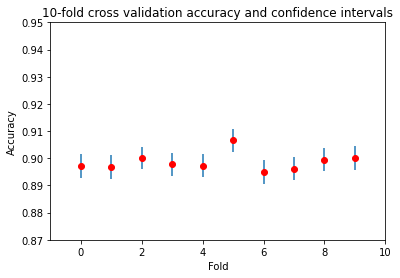

In [ ]:
# Brill Tagger with unigrams
'''
1) The input text is first tokenized, or broken into words.

2) A dictionary and some morphological rules then provide an initial tag for each word token. For example, a simple lookup would reveal that "dog" 
may be a noun or a verb (the most frequent tag is simply chosen), while an unknown word will be assigned some tag(s) based on capitalization, 
various prefix or suffix strings, etc. (such morphological analyses, which Brill calls Lexical Rules, may vary between implementations).

3) After all word tokens have (provisional) tags, contextual rules apply iteratively, to correct the tags by examining small amounts of context. 
This is where the Brill method differs from other part of speech tagging methods such as those using Hidden Markov Models. Rules are reapplied repeatedly, 
until a threshold is reached, or no more rules can apply.

  Brill rules are of the general form:

    tag1 → tag2 IF Condition
  where the Condition tests the preceding and/or following word tokens, or their tags. 
  
  For example, in Brill's notation:

   IN NN WDPREVTAG DT while
  
  would change the tag of a word from IN (preposition) to NN (common noun), if the preceding word's tag is DT (determiner) and the word itself is "while".
  This covers cases like "all the while" or "in a while", where "while" should be tagged as a noun rather than its more common use as a preposition.

  Rules should only operate if the tag being changed is also known to be permissible, for the word in question or in principle.
'''

## Reduced categories corpus results
import numpy as np
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import math
from nltk.tag import UnigramTagger, brill, brill_trainer
from sklearn.model_selection import KFold
from random import shuffle


# Carga del corpus                         
corpus_reducido = reduce_corpus_categories(cess_esp.tagged_sents())
shuffle(corpus_reducido)
n_particiones = 10
index = round(len(corpus_reducido)/n_particiones)
results =[]
deviation = []


for i in range(n_particiones):
    if i > 0 and i < 9:
      train = corpus_reducido[:(index*i)-1] + corpus_reducido[index*(i+1)+1:]
    elif i == 0:
      train = corpus_reducido[index*(i+1)+1:]
    else:
      train = corpus_reducido[:(index*i)-1]

    test = corpus_reducido[index*i:index*(i+1)]
    number_test_samples = sum([len(sentence) for sentence in test])

    # baseline tagger
    unigrams = UnigramTagger(train)

    # templates
    brill.Template._cleartemplates()
    templates = brill.nltkdemo18()

    # Train with unigrams
    unigram_trainer = nltk.tag.brill_trainer.BrillTaggerTrainer(initial_tagger=unigrams, templates=templates)
    unigram_model = unigram_trainer.train(train, max_rules=1000)

    # Test
    accuracy = unigram_model.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)


print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))

import matplotlib.pyplot as plt
x = [i for i in range(n_particiones)]
y = results
plt.axis([-1, 10, 0.87, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(str(n_particiones) + '-fold cross validation accuracy and confidence intervals')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=deviation,linestyle='None')
plt.show()

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.9286793267155805, 0.927343791829523, 0.9288085577277757, 0.9277602523659306, 0.9275852660300137, 0.9256286484059273, 0.9264231183071169, 0.927556097065692, 0.9260641093011035, 0.932836986515333]
Corpus with reduced categories deviation: [0.0037050038795768893, 0.003722710471088489, 0.003658636749462164, 0.003679228885932339, 0.00375253256907272, 0.0038527621641524894, 0.0036628988105126, 0.0036200620699088494, 0.0037177900284564233, 0.0035399266954988964]


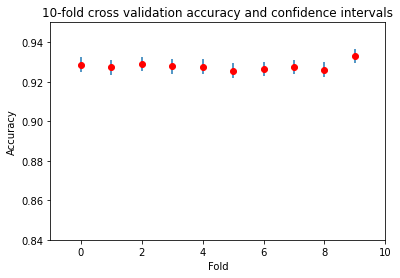

In [ ]:
# Brill Tagger with hmm initial tagger

## Reduced categories corpus results
import numpy as np
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import math
from nltk.tag import hmm, brill, brill_trainer
from sklearn.model_selection import KFold


# Carga del corpus                         
corpus_reducido = np.array(reduce_corpus_categories(cess_esp.tagged_sents()),dtype=object)
n_particiones = 10

# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus_reducido):
    number_test_samples = sum([len(corpus_reducido[i]) for i in test_index])
    train = corpus_reducido[train_index]
    test = corpus_reducido[test_index]
    # baseline tagger
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(train)

    # templates
    brill.Template._cleartemplates()
    templates = brill.nltkdemo18() 

    # Train with hmm
    hmm_trainer = nltk.tag.brill_trainer.BrillTaggerTrainer(initial_tagger=tagger_hmm, templates=templates)
    hmm_model = hmm_trainer.train(train)

    # Test
    accuracy = hmm_model.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))

print_plot(results, deviation, n_particiones)

In [ ]:
!pip install sklearn-pycrfsuite

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.9578688438792066, 0.9601715357812919, 0.9556773438331382, 0.9539470340059981, 0.9597948829851072, 0.9575033200531209, 0.953127499600064, 0.9572649572649573, 0.9569541735736057, 0.9558925987459135]
Corpus with reduced categories deviation: [0.0028484889013369544, 0.0028062711949325956, 0.0029424899941572994, 0.0029289483230301094, 0.0028437595533933203, 0.0028816167787221645, 0.0030252081049397367, 0.002853180979264061, 0.0029089399209930333, 0.0029462674906792475]


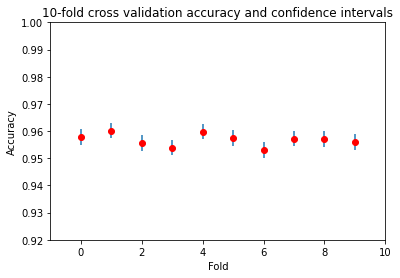

In [ ]:
# CRF
from nltk.tag import CRFTagger
import numpy as np
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import math
from sklearn.model_selection import KFold


# Carga del corpus                         
corpus_reducido = np.array(reduce_corpus_categories(cess_esp.tagged_sents()),dtype=object)
n_particiones = 10

# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus_reducido):
    number_test_samples = sum([len(corpus_reducido[i]) for i in test_index])
    train = corpus_reducido[train_index]
    test = corpus_reducido[test_index]
    crf_tagger = CRFTagger()
    crf_tagger.train(train,'model.crf.tagger')
    accuracy = crf_tagger.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))

import matplotlib.pyplot as plt
x = [i for i in range(n_particiones)]
y = results
plt.axis([-1, 10, 0.92, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(str(n_particiones) + '-fold cross validation accuracy and confidence intervals')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=deviation,linestyle='None')
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.9933823529411765, 0.9929979253112033, 0.9927462798015895, 0.9927043608025203, 0.991927503775845, 0.9918881885448068, 0.9918371730841523, 0.9917599830974012, 0.9913195336175459, 0.9927502216658843]
Corpus with reduced categories deviation: [0.0011516821087987994, 0.0011770369499933006, 0.001214693061110737, 0.0012400591996565202, 0.001265721155410034, 0.0013015906515625782, 0.0012923943651415716, 0.001287731042672138, 0.0013030545903565548, 0.0012008628110373443]


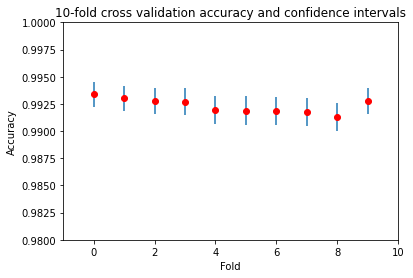

In [ ]:
# Perceptrón load=true
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('cess_esp')
import numpy as np
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import cess_esp
import math
from sklearn.model_selection import KFold


# Carga del corpus                         
corpus_reducido = np.array(reduce_corpus_categories(cess_esp.tagged_sents()),dtype=object)
n_particiones = 10

# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus_reducido):
    number_test_samples = sum([len(corpus_reducido[i]) for i in test_index])
    train = corpus_reducido[train_index]
    test = corpus_reducido[test_index]
    perceptron_tagger = PerceptronTagger()
    perceptron_tagger.train(train)
    accuracy = perceptron_tagger.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)

print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))

import matplotlib.pyplot as plt
x = [i for i in range(n_particiones)]
y = results
plt.axis([-1, 10, 0.98, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(str(n_particiones) + '-fold cross validation accuracy and confidence intervals')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=deviation,linestyle='None')
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
Corpus with reduced categories accuracy: [0.9682426110407838, 0.968110276720502, 0.9670582093448186, 0.9649708090075062, 0.9696100308150037, 0.9677385345282025, 0.9701220818162347, 0.9666056006281079, 0.9662739783152627, 0.9651856763925729]
Corpus with reduced categories deviation: [0.0025497937293364973, 0.0024698660042626833, 0.002527638156119169, 0.002601708465385966, 0.002452374922830687, 0.002514452690999509, 0.0024417573327038173, 0.0025476749815145994, 0.0025545781194646323, 0.0026708481225574225]


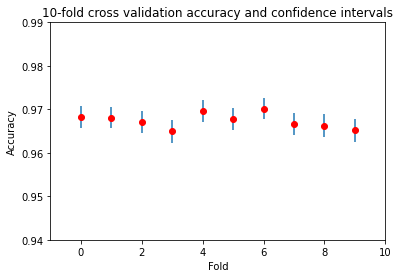

In [ ]:
# Perceptrón load=false
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('cess_esp')
import numpy as np
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import cess_esp
import math
from sklearn.model_selection import KFold


# Carga del corpus                         
corpus_reducido = np.array(reduce_corpus_categories(cess_esp.tagged_sents()),dtype=object)
n_particiones = 10
# Ten-fold cross-validation barajando el corpus
kf = KFold(n_splits=n_particiones, shuffle=True)
results =[]
deviation = []
for train_index, test_index in kf.split(corpus_reducido):
    number_test_samples = sum([len(corpus_reducido[i]) for i in test_index])
    train = corpus_reducido[train_index]
    test = corpus_reducido[test_index]
    perceptron_tagger = PerceptronTagger(load=False)
    perceptron_tagger.train(train)
    accuracy = perceptron_tagger.evaluate(test)
    results.append(accuracy)
    ic = 1.96 * math.sqrt(accuracy * (1 - accuracy) / number_test_samples)
    deviation.append(ic)


print('Corpus with reduced categories accuracy: ' + str(results))
print('Corpus with reduced categories deviation: ' + str(deviation))


import matplotlib.pyplot as plt
x = [i for i in range(n_particiones)]
y = results
plt.axis([-1, 10, 0.94, 0.99])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(str(n_particiones) + '-fold cross validation accuracy and confidence intervals')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=deviation,linestyle='None')
plt.show()

#### ***Tarea 5: Evaluación del paquete Freeling***
Realizar un estudio de la herramienta Freeling. Considerar diferentes aspectos: facilidad/problemas de instalación, facilidad de uso, documentación, funcionalidad, etc. Esta herramienta de libre distribución se puede obtener en la siguiente dirección http://nlp.lsi.upc.edu/freeling/

Usar Freeling para realizar el etiquetado morfosintáctico del texto del fichero Alicia.txt. Se debe entregar un fichero tipo texto con el formato: palabra/etiqueta

> freeling\bin\analyze.bat -f es.cfg < Alicia_utf8.txt > .\results.txt